## Check fitness change after convergence

In [1]:
import csv
import pandas as pd

In [2]:
import pandas as pd

def check_post_convergence_fitness_stability(df, label=''):
    issues = []

    # Group by each run and epoch
    grouped = df.groupby(['run', 'epoch'])

    for (run, epoch), group in grouped:
        group = group.sort_values('iteration')  # Ensure iterations are in order

        # Find the first index where labelChanged is False
        convergence_point = group[group['labelChanged'] == False]
        if convergence_point.empty:
            continue  # never converged, skip

        first_false_idx = convergence_point.index[0]
        fitness_at_convergence = group.loc[first_false_idx, 'fitness']

        # All fitness values after convergence
        post_convergence_fitness = group.loc[first_false_idx:, 'fitness']

        if not (post_convergence_fitness == fitness_at_convergence).all():
            issues.append((run, epoch))

    # Print results
    print(f"\n🔍 Checking score function: {label.upper()}")
    if issues:
        print(f"⚠️ Fitness changed after convergence in the following (run, epoch) pairs:")
        for run, epoch in issues:
            print(f" - Run {run}, Epoch {epoch}")
    else:
        print(f"✅ No post-convergence fitness changes detected for the {label} score function.")

# Load the CSVs
df_paper = pd.read_csv('iterations_info_paper_penalty.csv')
df_new = pd.read_csv('iterations_info_new_penalty.csv')

# Run the checks
check_post_convergence_fitness_stability(df_paper, label='paper')
check_post_convergence_fitness_stability(df_new, label='new')



🔍 Checking score function: PAPER
⚠️ Fitness changed after convergence in the following (run, epoch) pairs:
 - Run 19, Epoch 20

🔍 Checking score function: NEW
✅ No post-convergence fitness changes detected for the new score function.


## Check label changes after convergence

In [3]:

def check_label_changed_reversion(df, label=''):
    issues = []

    # Group by run and epoch
    grouped = df.groupby(['run', 'epoch'])

    for (run, epoch), group in grouped:
        group = group.sort_values('iteration')

        # Find the first False (convergence)
        convergence_point = group[group['labelChanged'] == False]
        if convergence_point.empty:
            continue  # never converged, skip

        first_false_idx = convergence_point.index[0]

        # Check if labelChanged becomes True after convergence
        post_convergence = group.loc[first_false_idx:]
        if post_convergence['labelChanged'].any():  # if any True after first False
            issues.append((run, epoch))

    # Print results
    print(f"\n🔍 Checking labelChanged reversion for: {label.upper()}")
    if issues:
        print(f"⚠️ labelChanged reverted to True after convergence in the following (run, epoch) pairs:")
        for run, epoch in issues:
            print(f" - Run {run}, Epoch {epoch}")
    else:
        print(f"✅ No labelChanged reversion detected for the {label} score function.")

# Load data
df_paper = pd.read_csv('iterations_info_paper_penalty.csv')
df_new = pd.read_csv('iterations_info_new_penalty.csv')

# Run the checks
check_label_changed_reversion(df_paper, label='paper')
check_label_changed_reversion(df_new, label='new')



🔍 Checking labelChanged reversion for: PAPER
⚠️ labelChanged reverted to True after convergence in the following (run, epoch) pairs:
 - Run 2, Epoch 22
 - Run 3, Epoch 15
 - Run 4, Epoch 7
 - Run 8, Epoch 23
 - Run 15, Epoch 19
 - Run 15, Epoch 22
 - Run 16, Epoch 27
 - Run 19, Epoch 20
 - Run 21, Epoch 14
 - Run 21, Epoch 16
 - Run 21, Epoch 19
 - Run 23, Epoch 19
 - Run 23, Epoch 23
 - Run 24, Epoch 1
 - Run 25, Epoch 20
 - Run 27, Epoch 21
 - Run 28, Epoch 6
 - Run 35, Epoch 22
 - Run 38, Epoch 21
 - Run 40, Epoch 30
 - Run 43, Epoch 7
 - Run 43, Epoch 22
 - Run 47, Epoch 18
 - Run 48, Epoch 21

🔍 Checking labelChanged reversion for: NEW
⚠️ labelChanged reverted to True after convergence in the following (run, epoch) pairs:
 - Run 1, Epoch 23
 - Run 2, Epoch 20
 - Run 2, Epoch 25
 - Run 10, Epoch 17
 - Run 16, Epoch 21
 - Run 19, Epoch 28
 - Run 27, Epoch 19
 - Run 27, Epoch 23
 - Run 34, Epoch 20
 - Run 42, Epoch 23
 - Run 46, Epoch 16


## Monotonicity Test

In [16]:
import matplotlib.pyplot as plt

def plot_fitness_single(run, epoch, df, label='New'):
    subset = df[(df['run'] == run) & (df['epoch'] == epoch)].sort_values('iteration')

    plt.figure(figsize=(14, 5))
    plt.plot(
        subset['iteration'], subset['fitness'],
        marker='o', markersize=1.5, linewidth=1, color='blue'
    )
    plt.title(f'{label} Score Function — Run {run}, Epoch {epoch}', fontsize=19)
    plt.xlabel('Iteration', fontsize=18)
    plt.ylabel('Fitness', fontsize=18)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


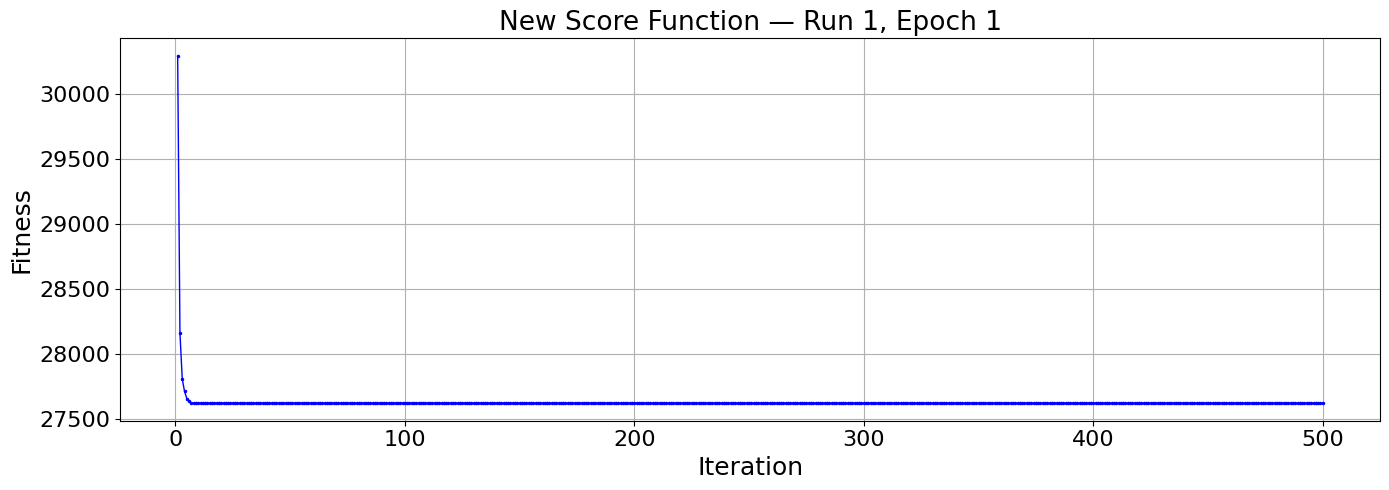

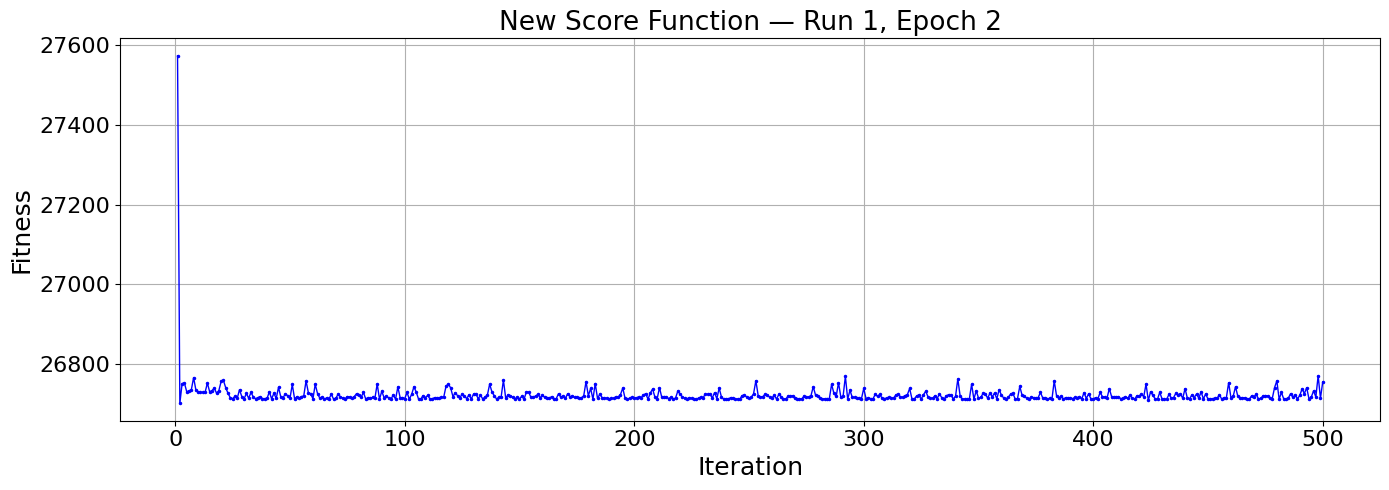

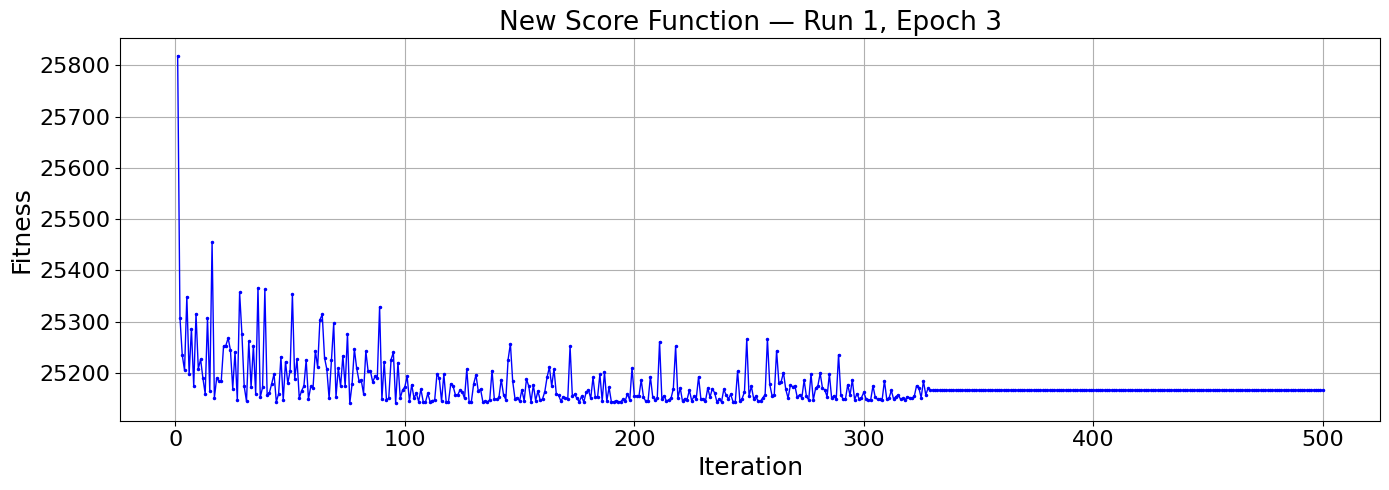

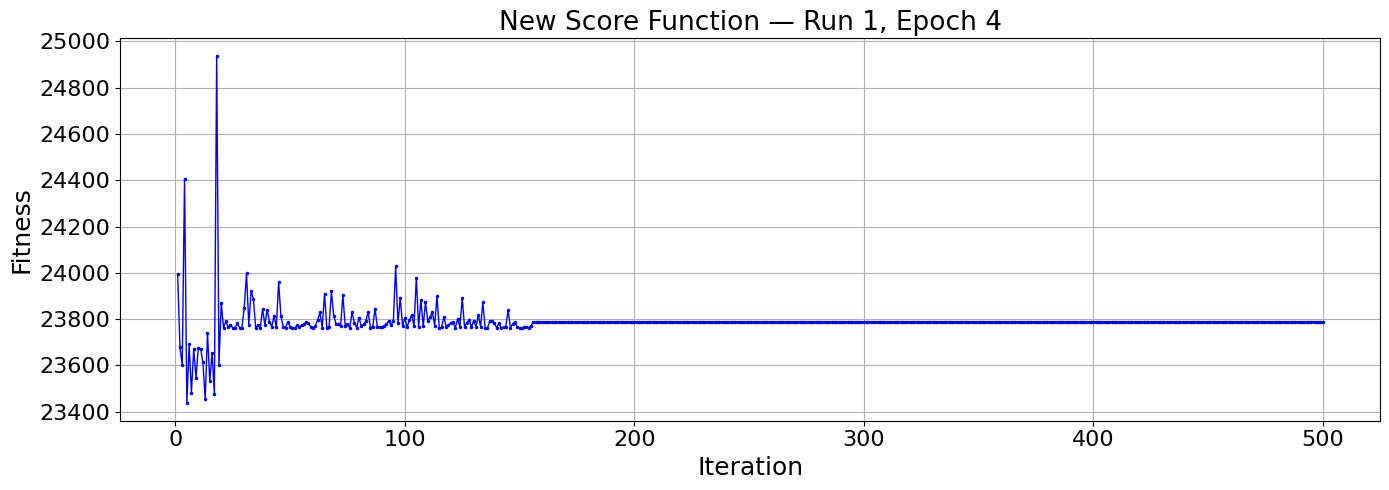

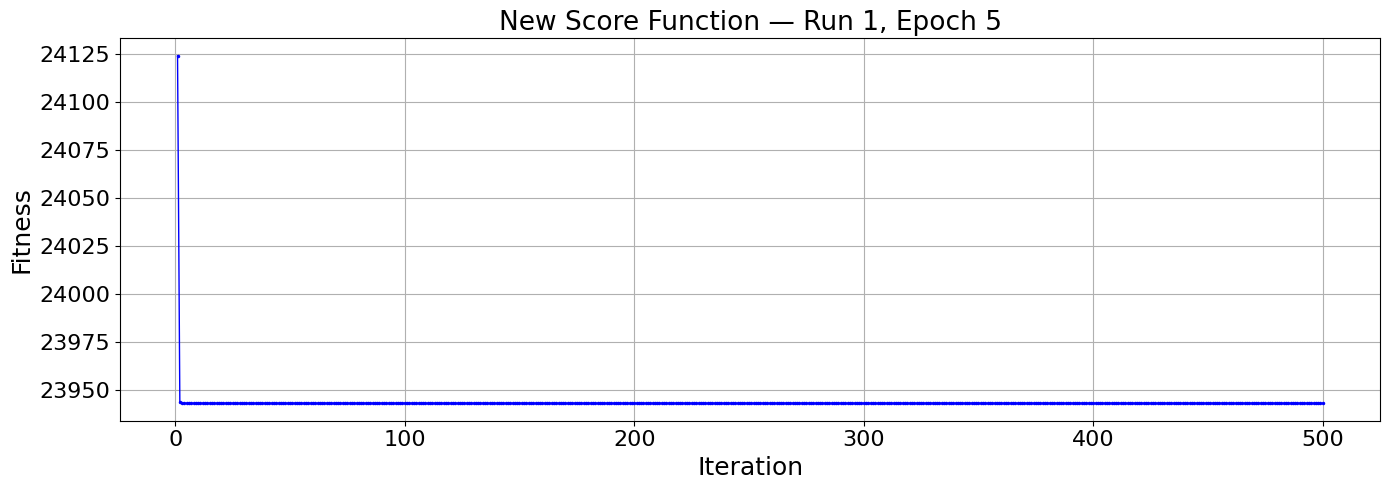

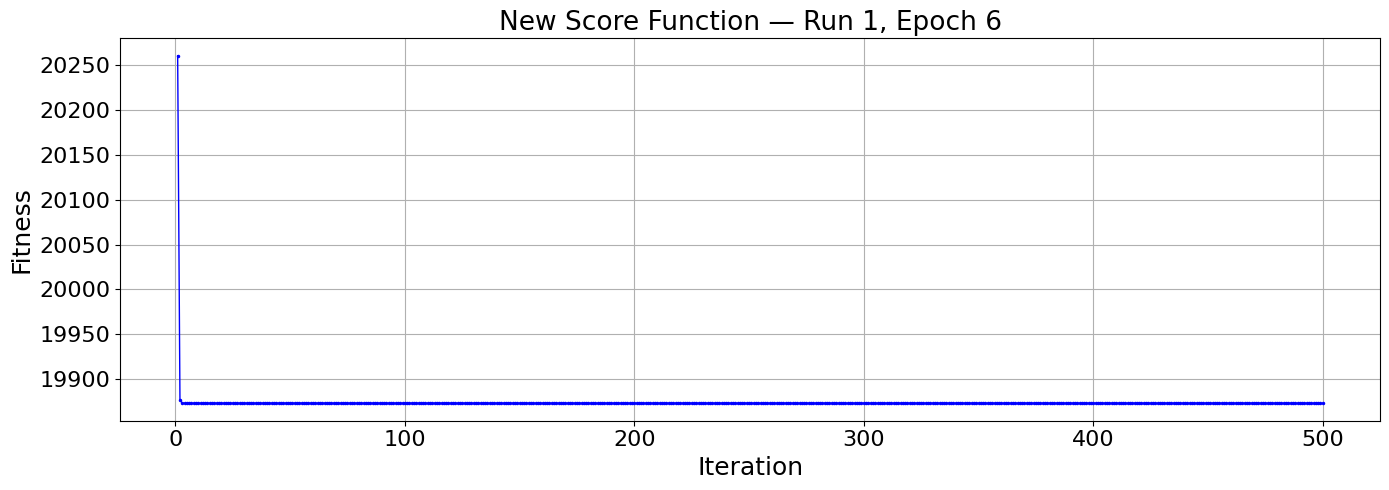

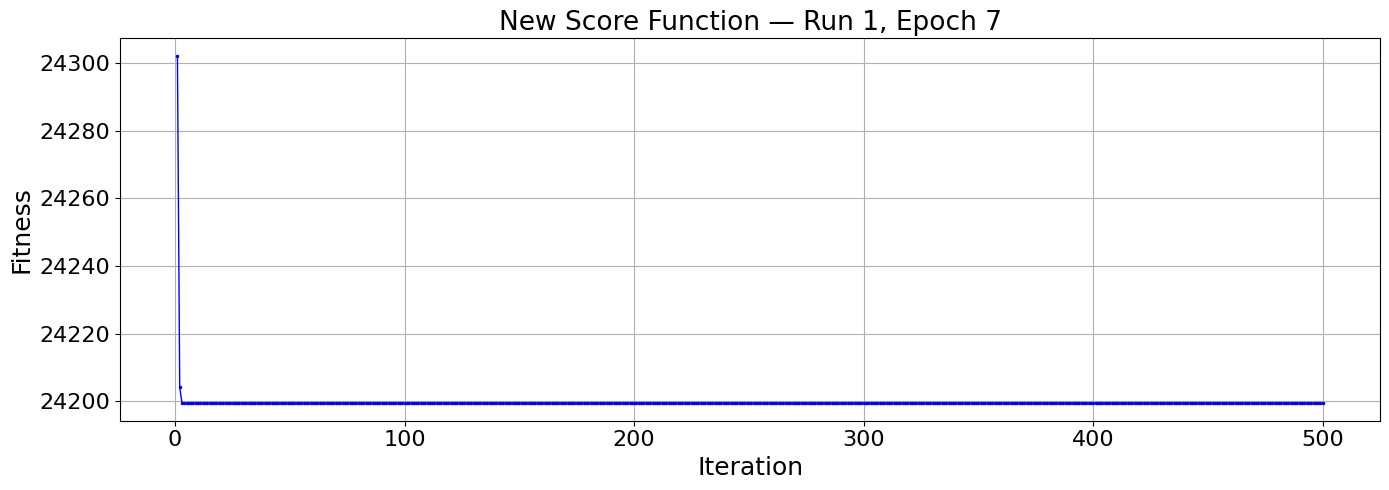

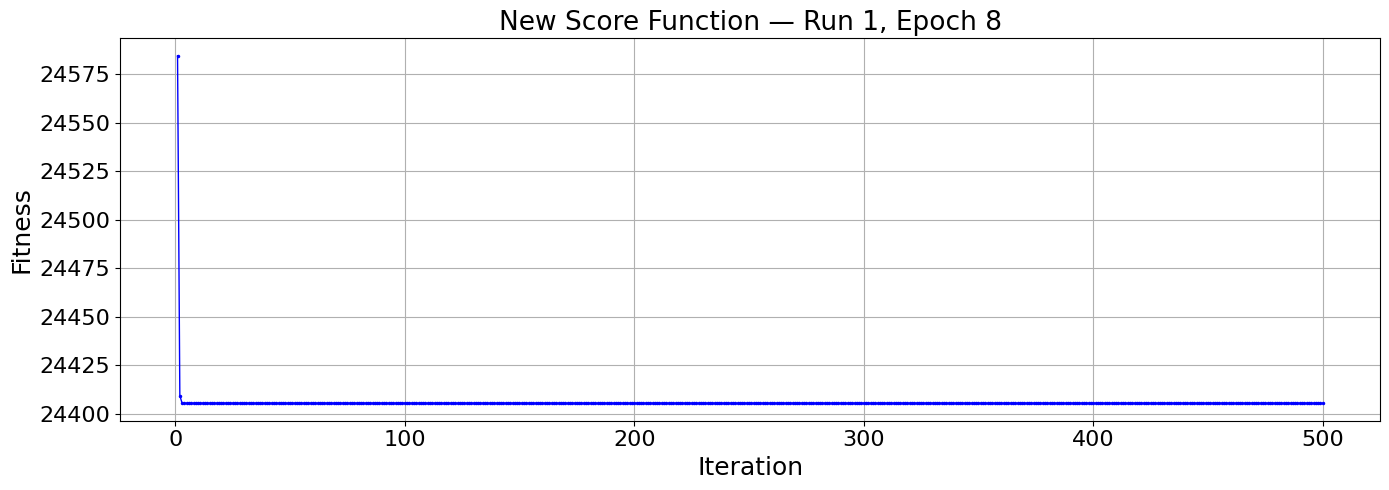

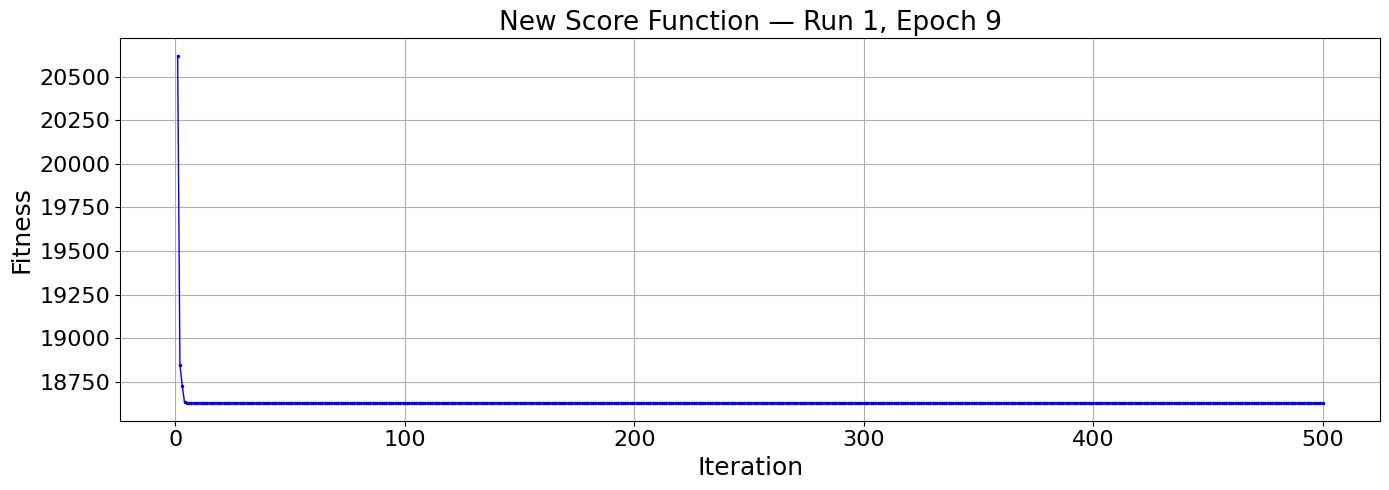

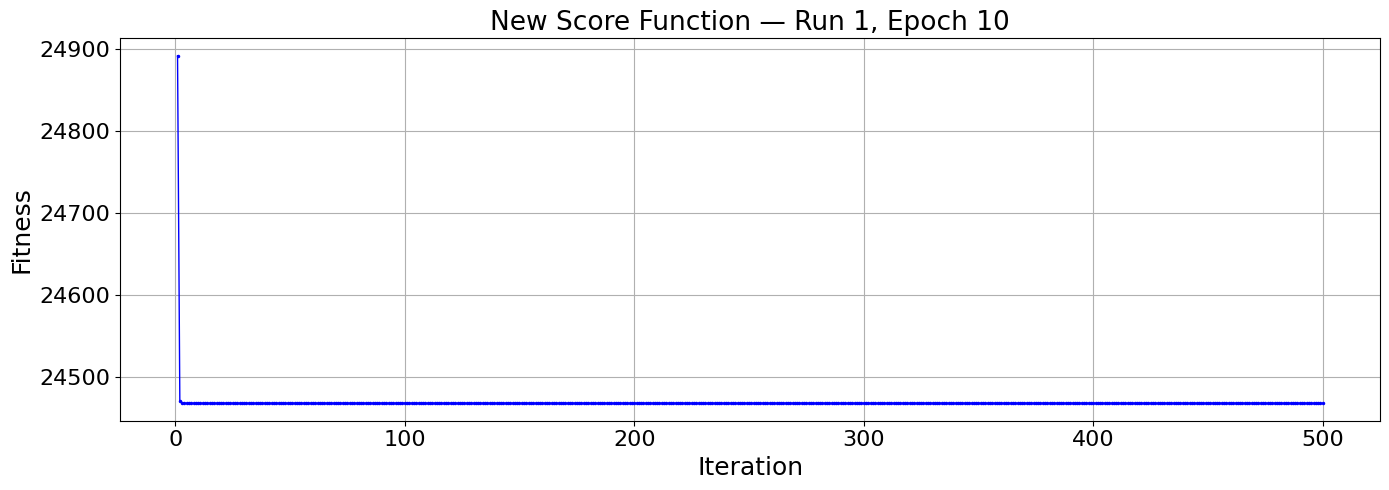

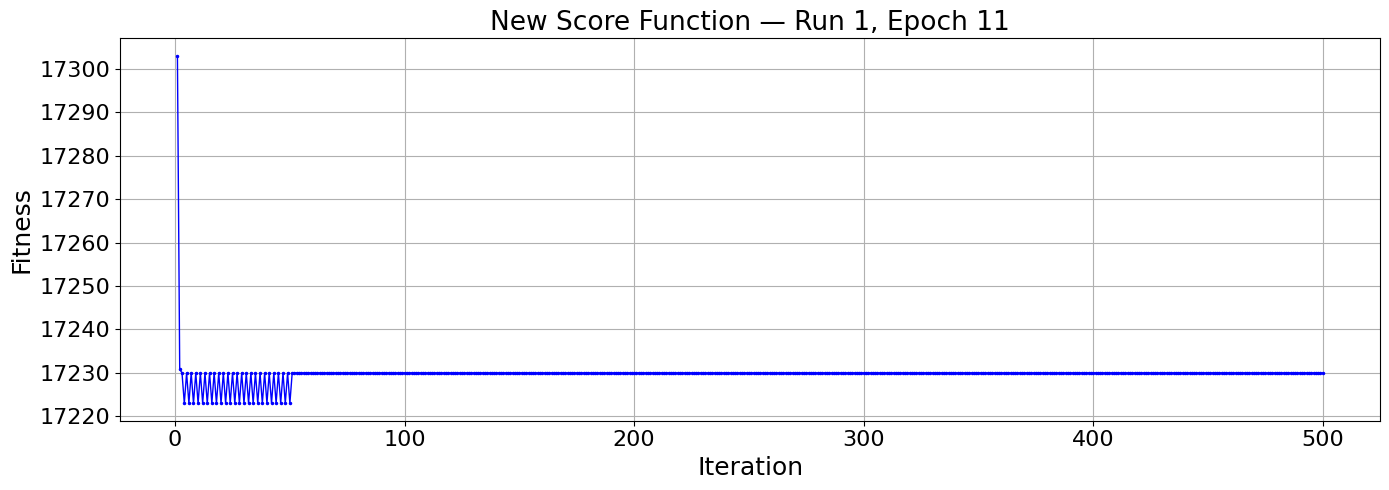

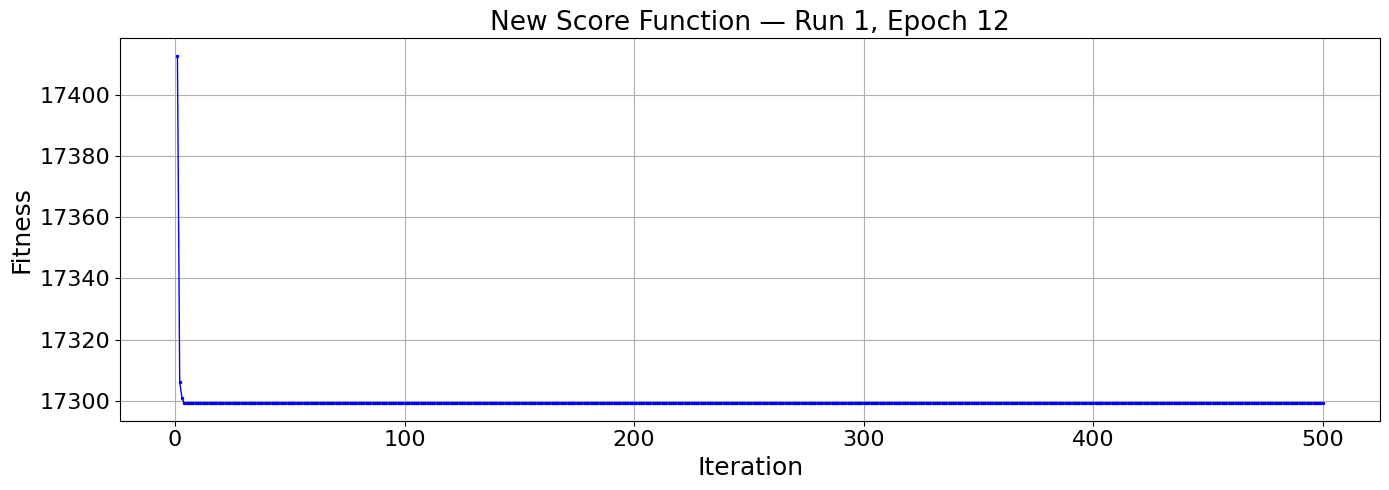

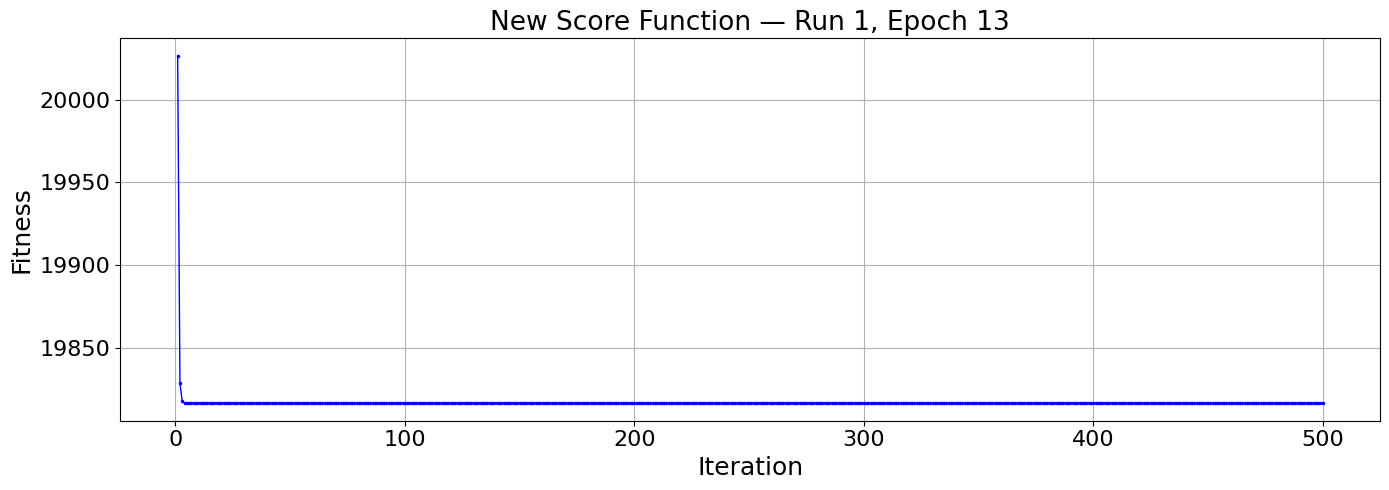

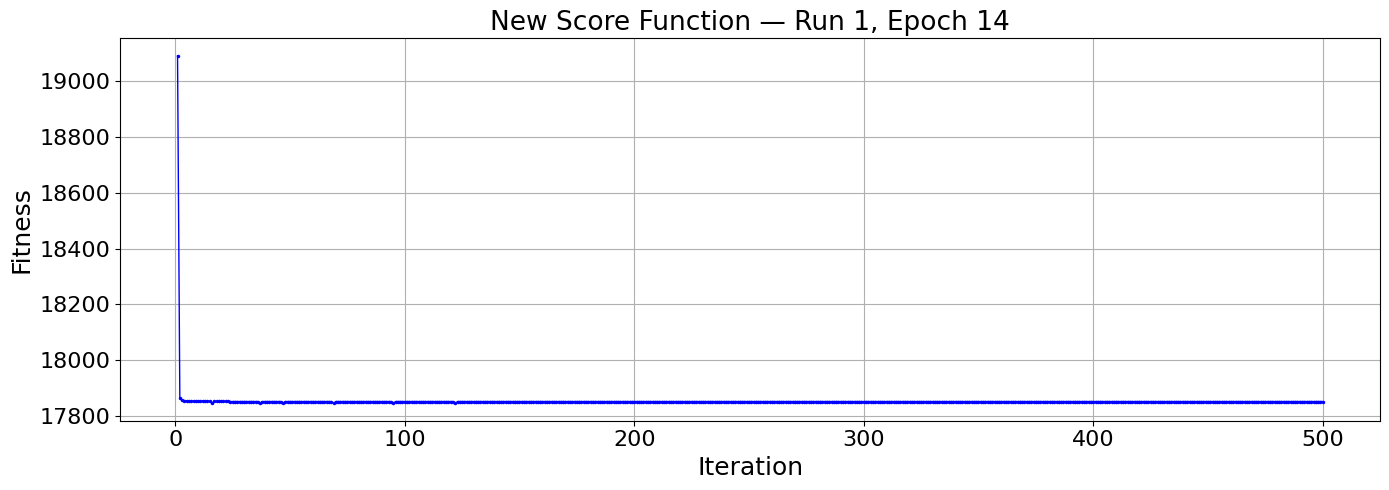

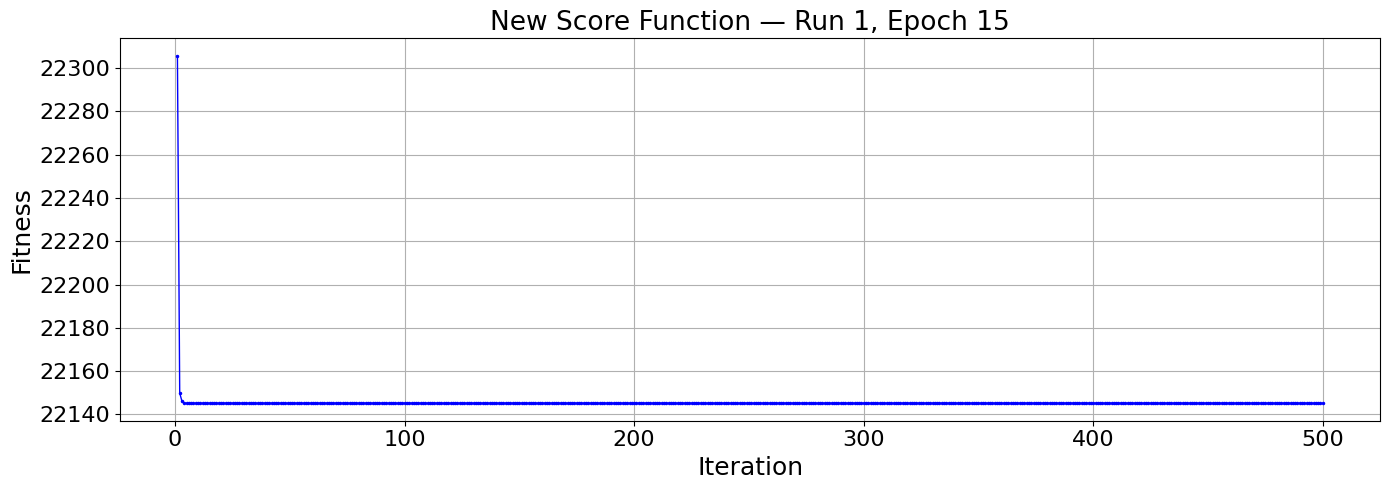

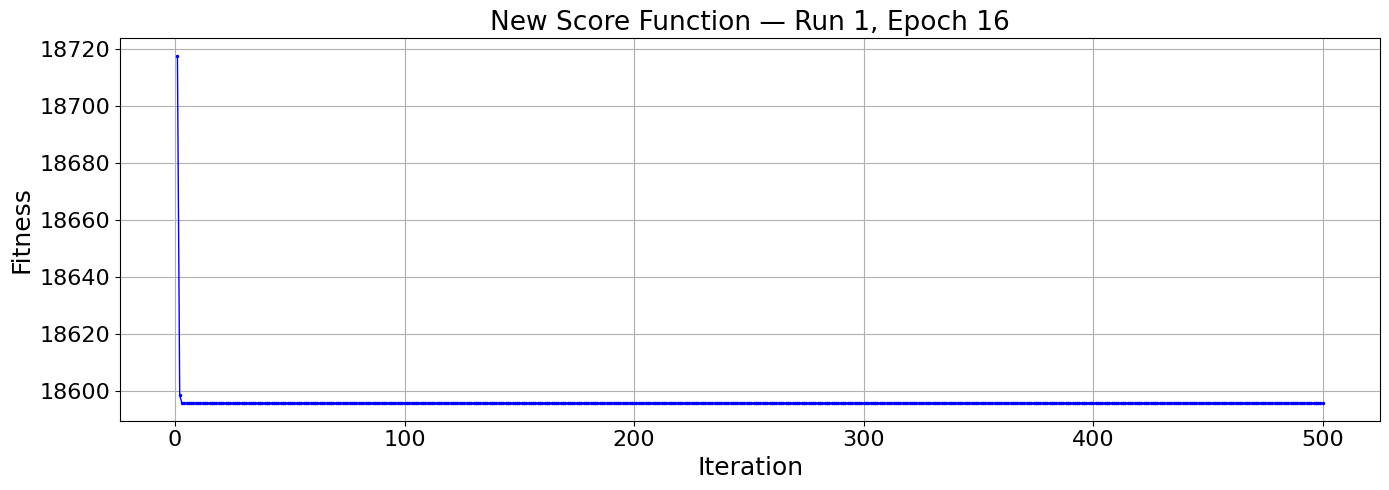

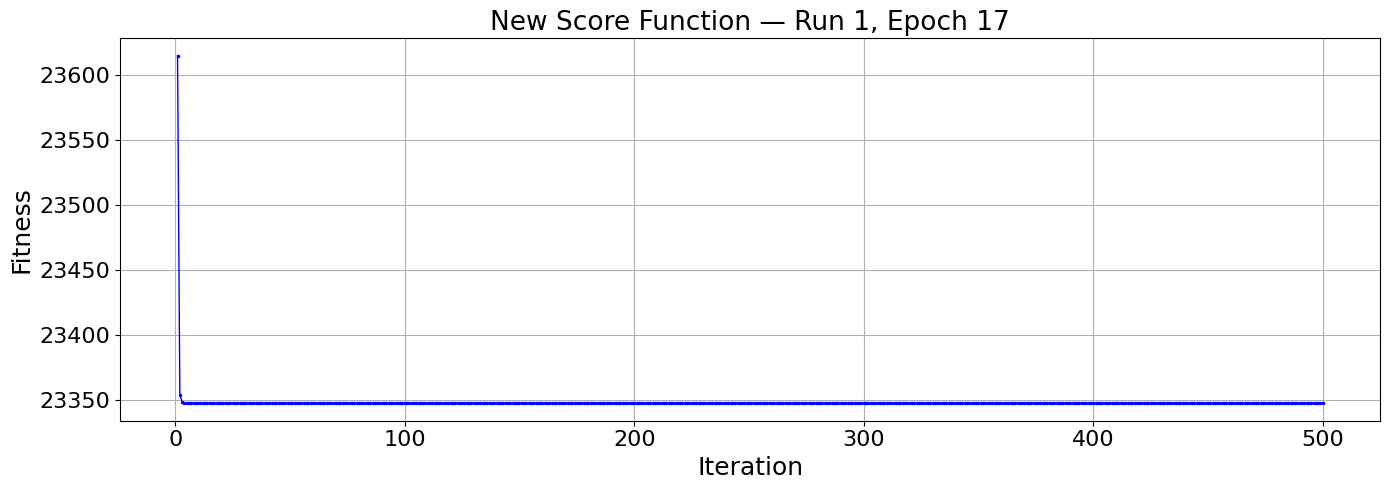

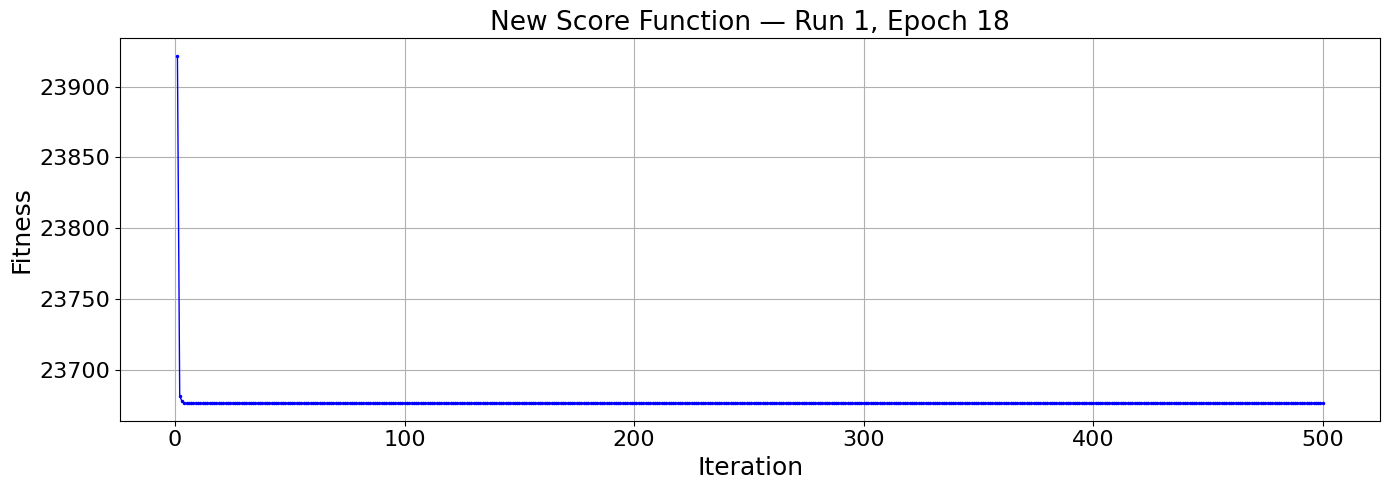

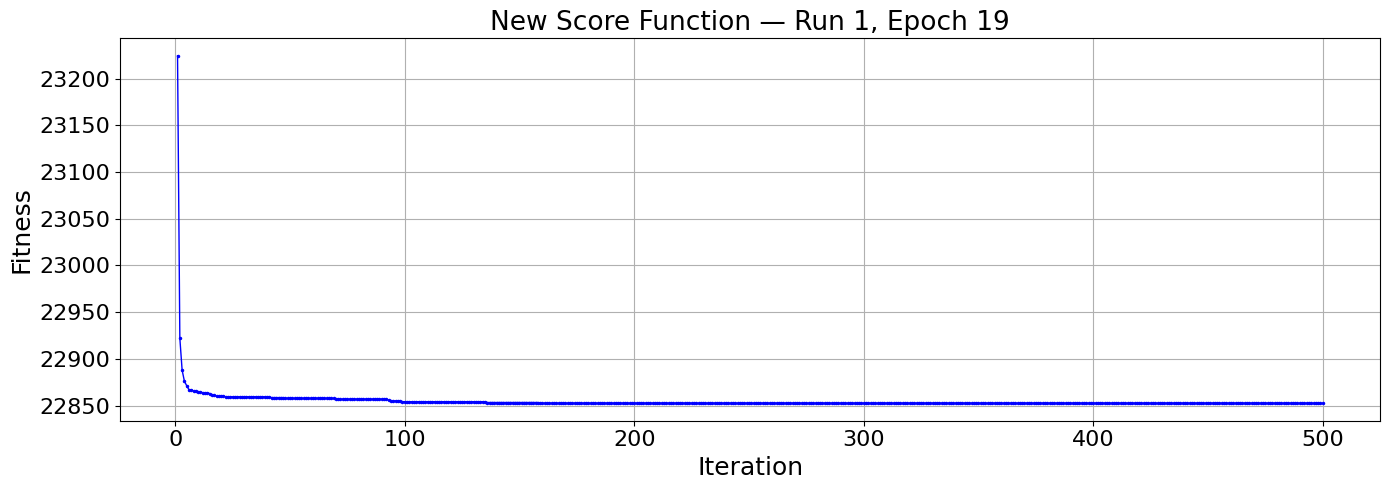

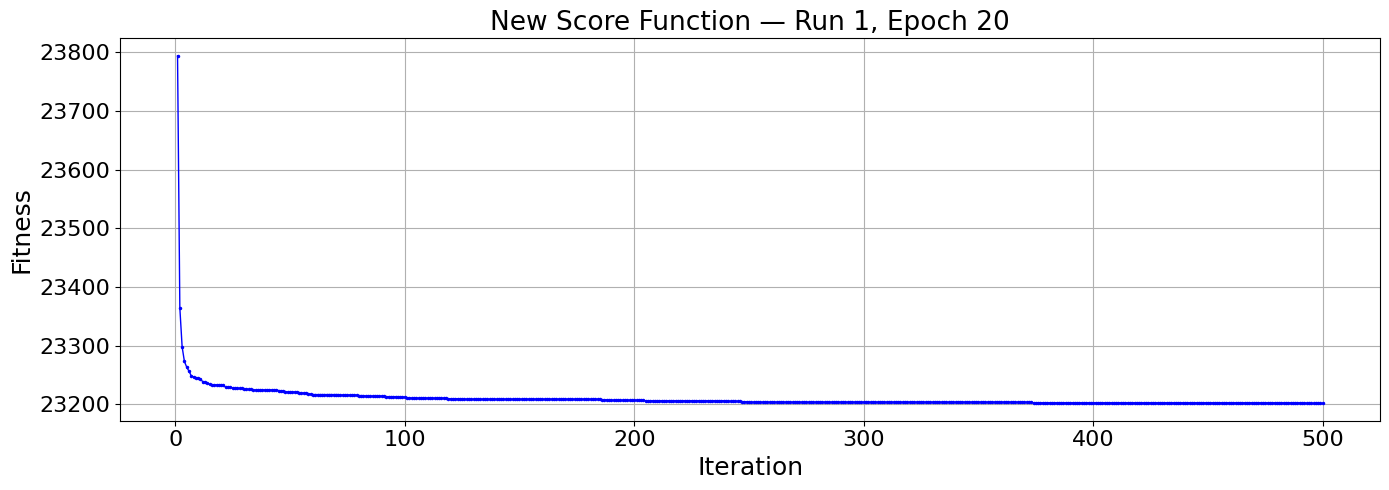

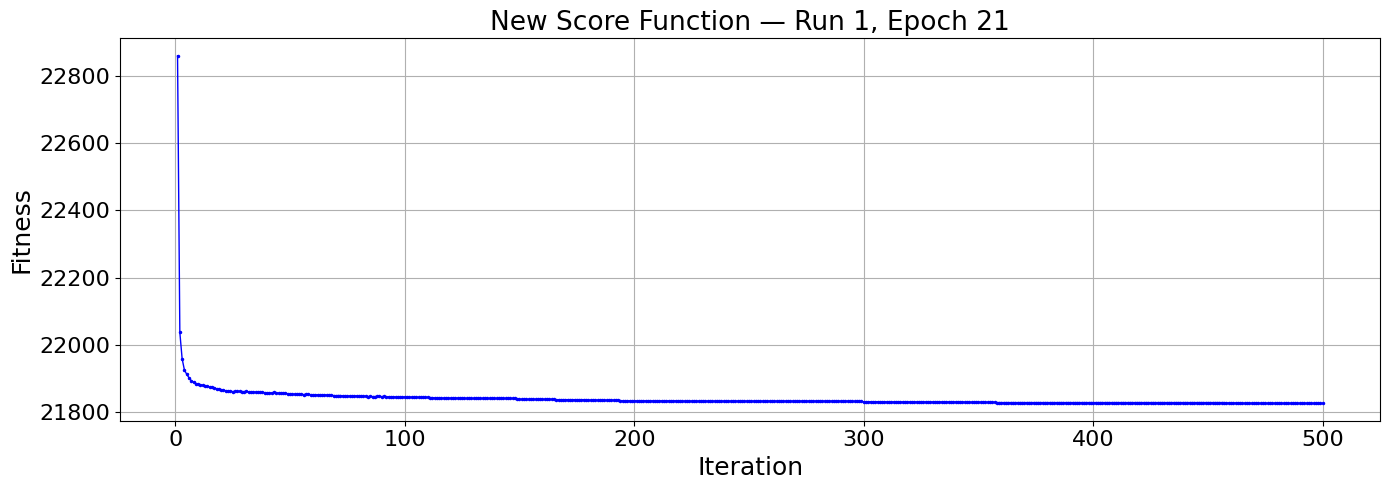

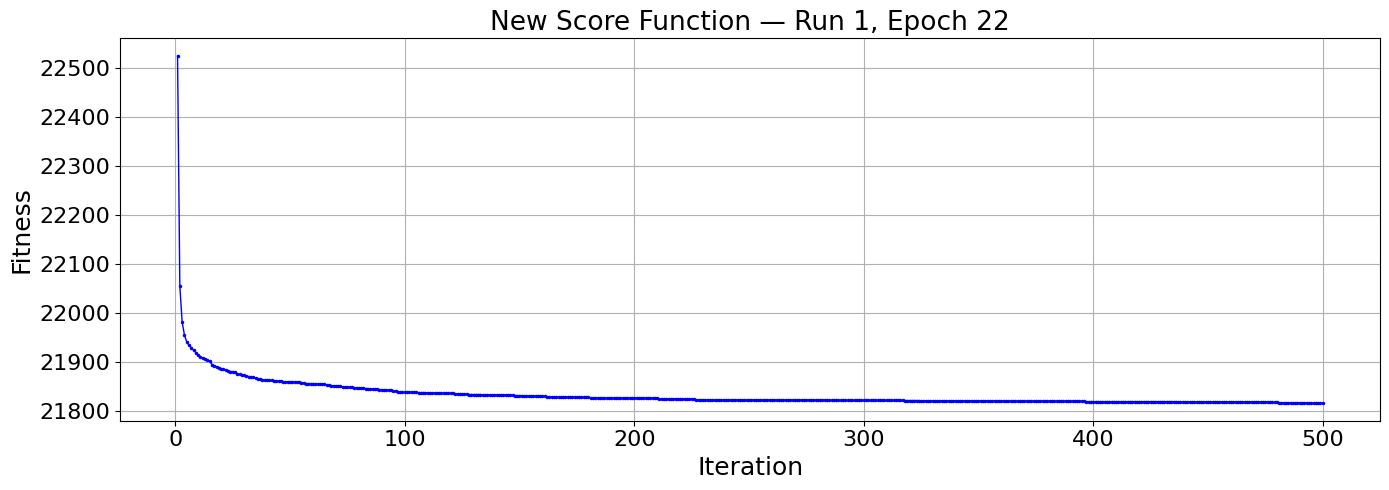

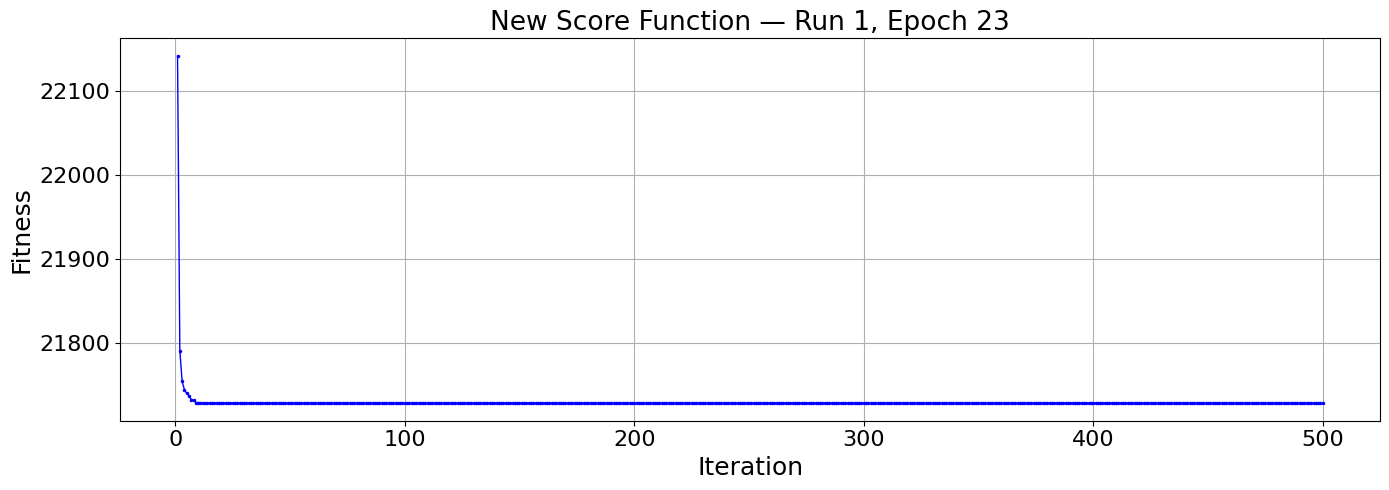

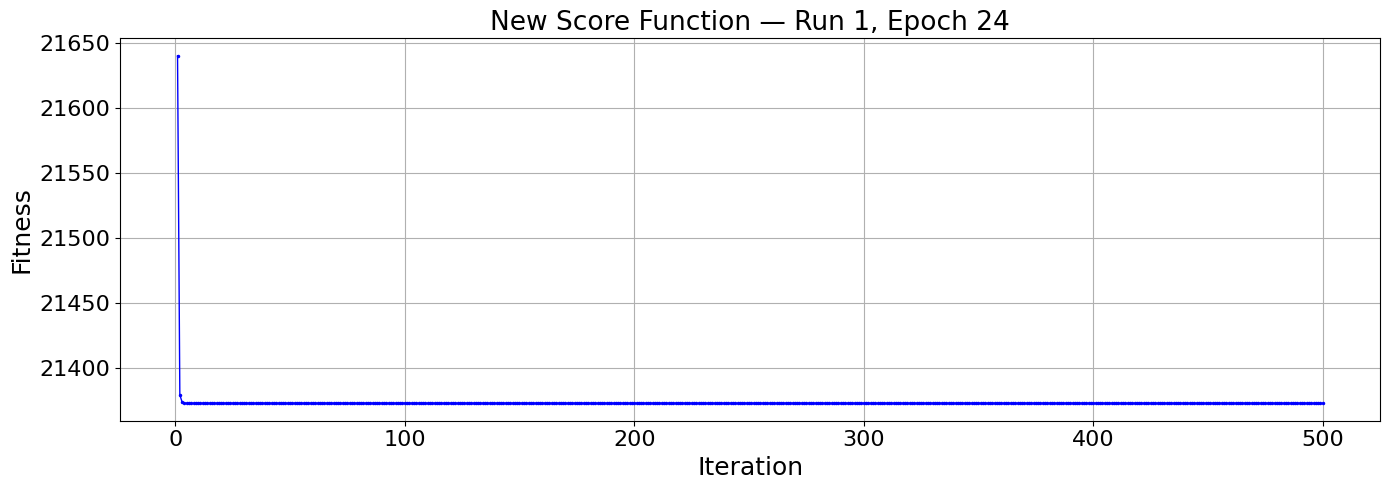

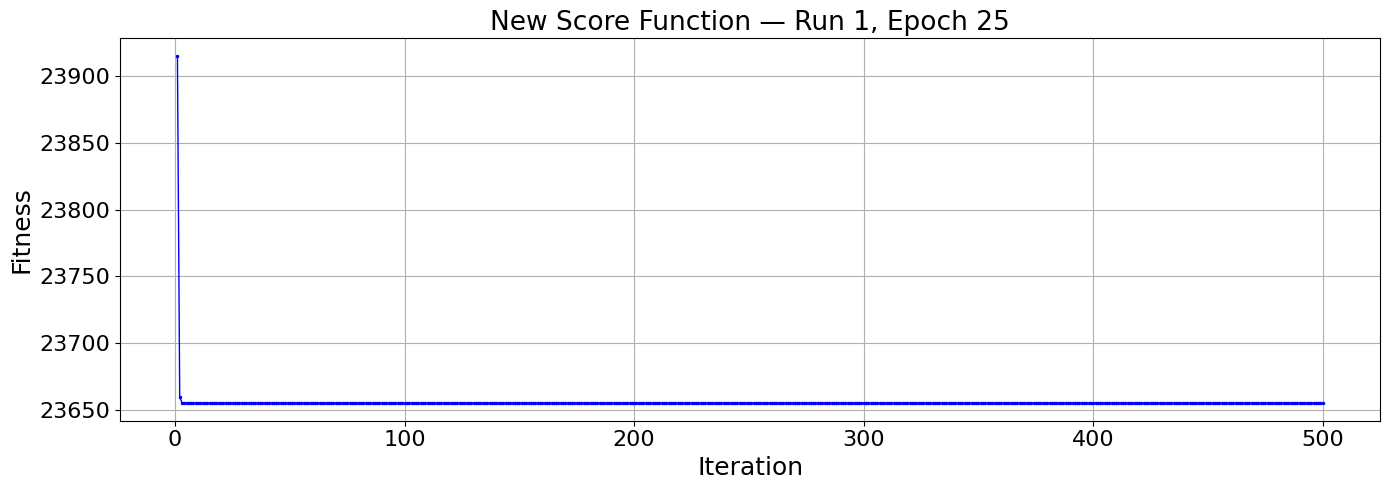

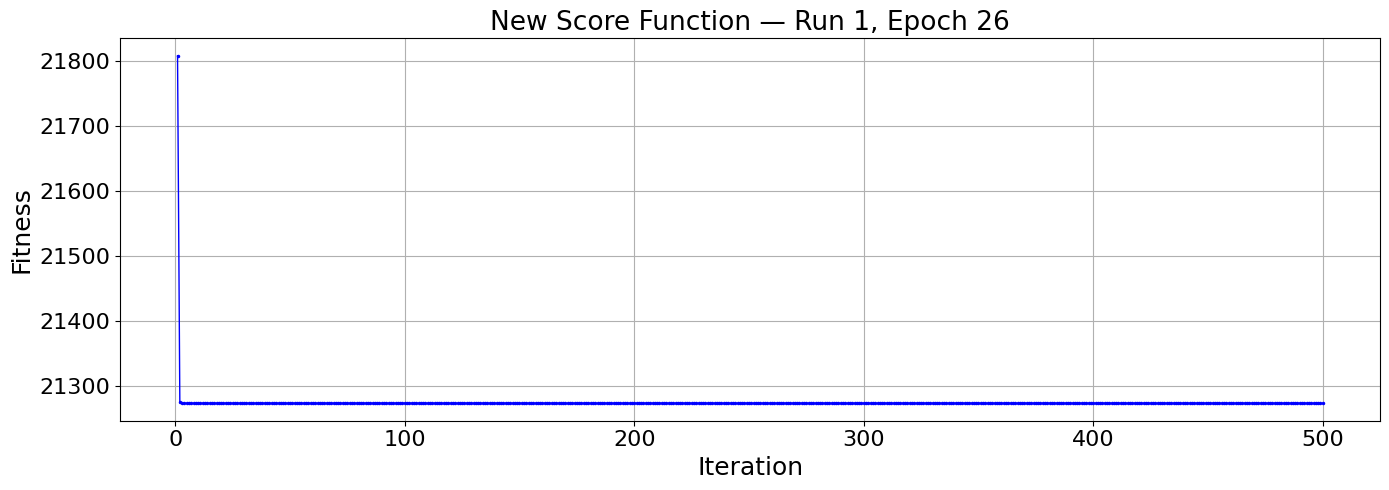

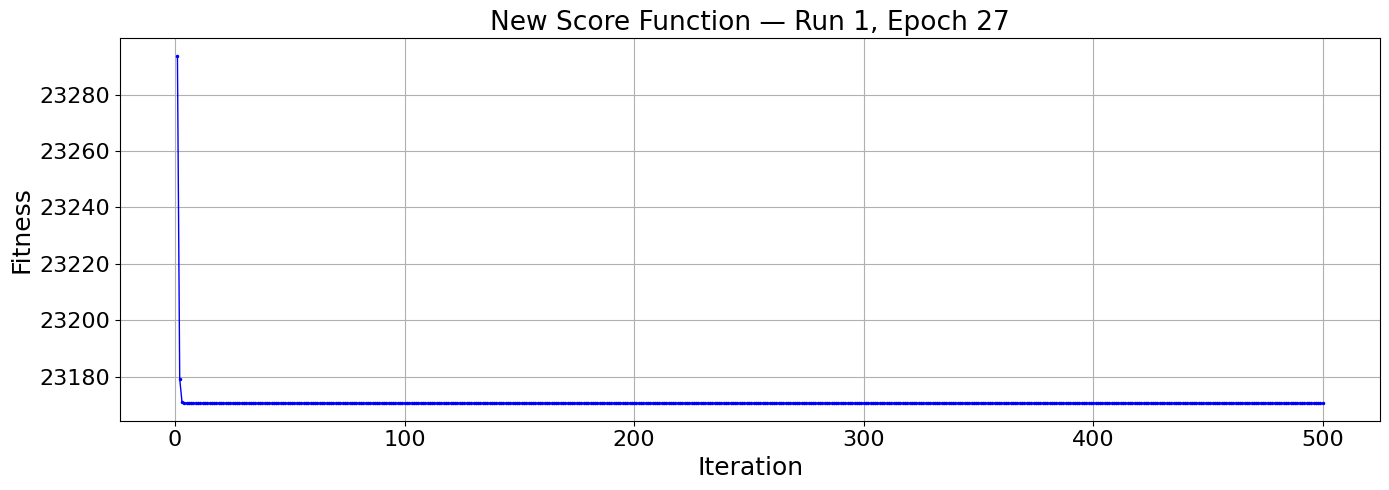

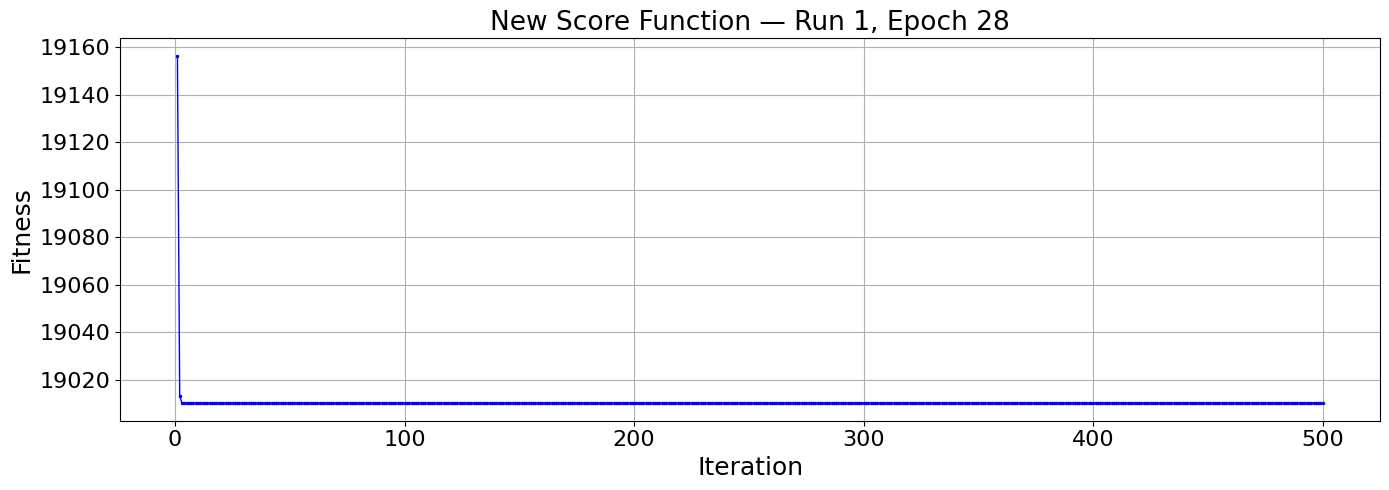

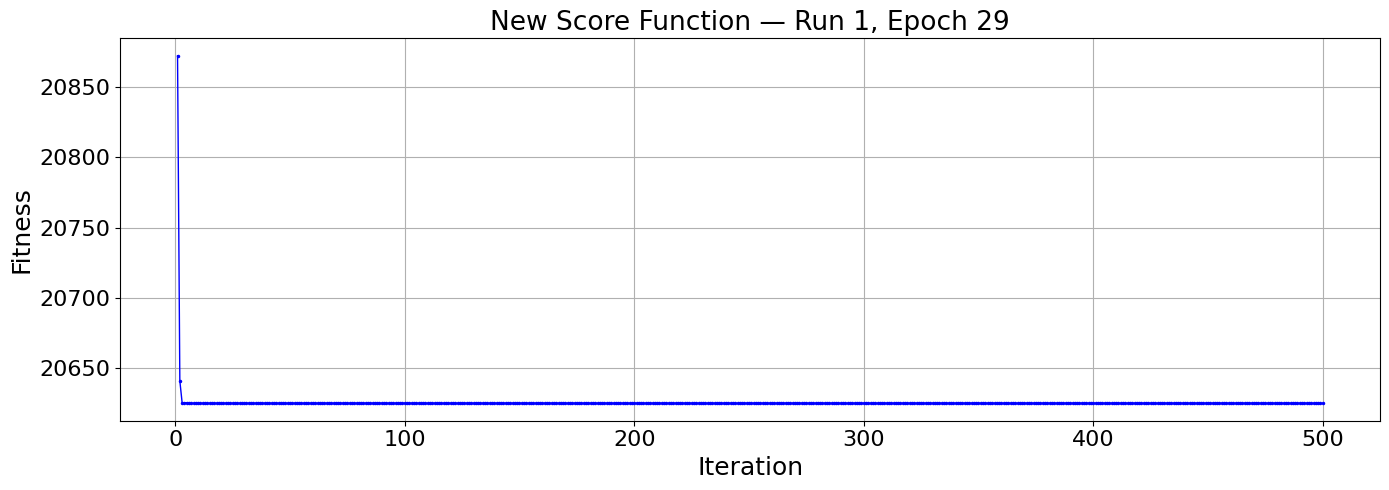

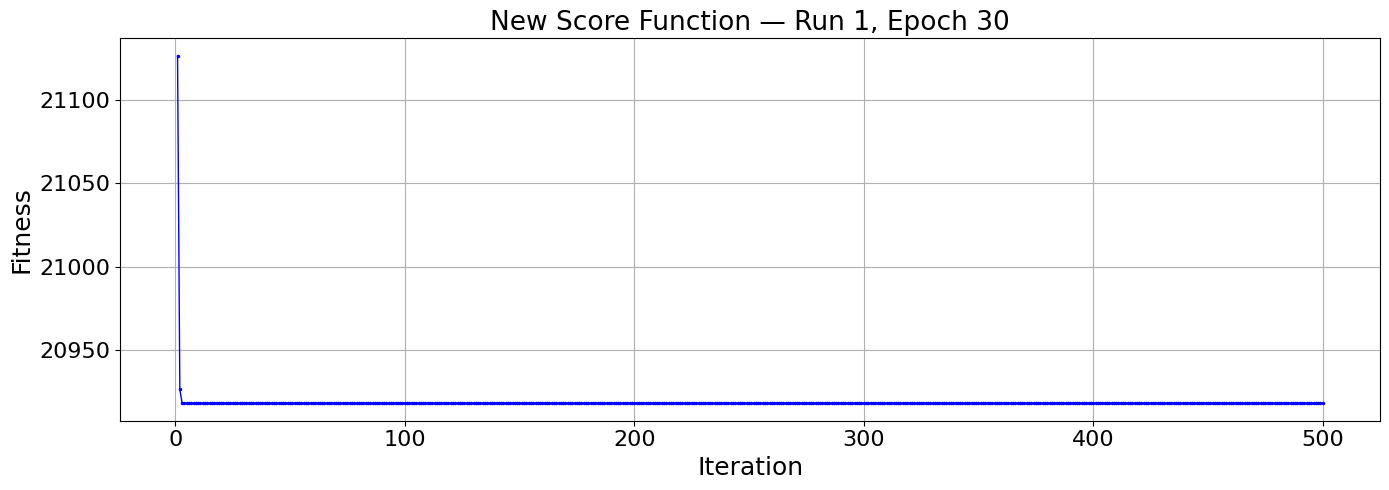

In [17]:
# run this to choose an appropriate epoch

df_new = pd.read_csv('iterations_info_new_penalty.csv')

# Loop through all 30 epochs for run 1
for epoch in range(1, 31):
    plot_fitness_single(run=1, epoch=epoch, df=df_new, label='New')


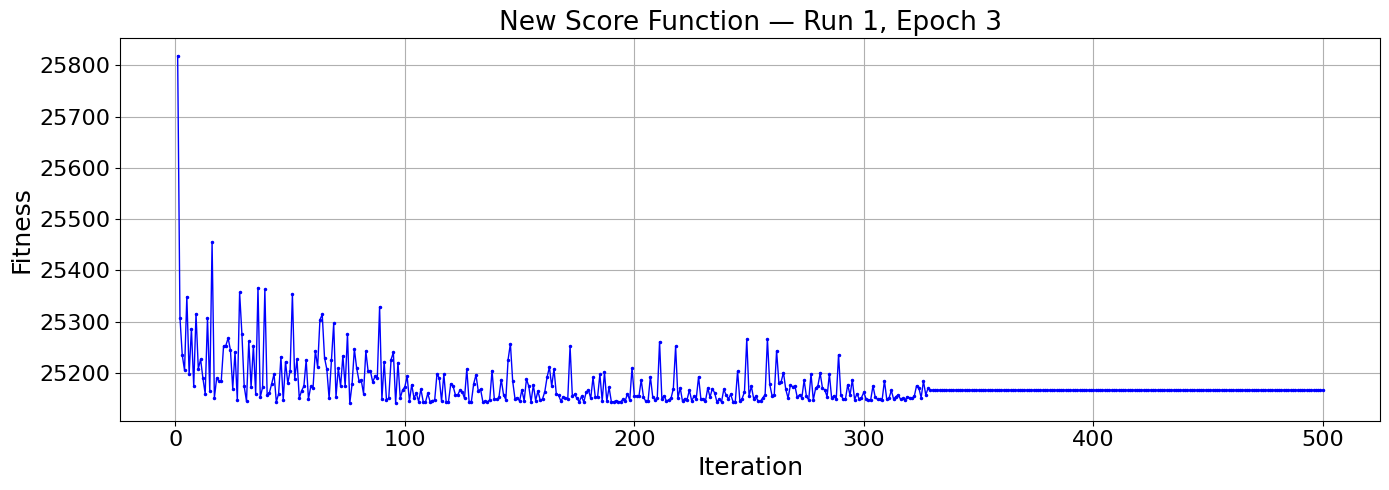

In [18]:
df_new = pd.read_csv('iterations_info_new_penalty.csv')
plot_fitness_single(run=1, epoch=3, df=df_new, label='New')
